## equity price in sector

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline


# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

from IPython.display import display
# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

import os
import sys
import seaborn as sns
# from pathlib import Path
# _this_dir = Path(__file__).parent.parent
from dataset.us_equity_load import *
from utils.us_equity_utils import *

from dataset.us_equity_xq_factor import *
from dataset.us_equity_load import *
from factor.price import*


In [2]:

# sector_name = "IT_Services"
# sector_name = "Entertainment"
# sector_name = "Semiconductors_Equipment"
# sector_name = "Automobiles"
# sector_name = "Internet_Retail"
sector_name = "Electronic_Equipment_Instruments_Components"

symbols = us_equity_symbol_load()

symbols = us_dir0_load_csv(dir0 = 'symbol', filename= sector_name +'.csv')['symbol'].values

print("symbol list len ", len(symbols))

factors = ['pe', 'ps', 'roe', 'roa', 'gross_profit_revenue', 'profit_revenue', 'revenue_increase_q2q_rate', 'cash_increase_q2q_rate', 'profit_increase_q2q_rate']
start_date = '2022-06-01'
end_date = '2024-06-01'
us_analysis_finance = us_equity_xq_factor(symbols, factors,  start_date, end_date)
result = us_analysis_finance.finance_factors_rank(['pe', 'ps', 'revenue_increase_q2q_rate', 'cash_increase_q2q_rate', 'profit_increase_q2q_rate'])

us_equity_research_folder("finance", sector_name + start_date + "_" + end_date + ".csv", result[2])

# finance_with_price_=finance_calculate_ratio_changes(result[2], 5, 0)
# finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 5)
finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 20)
finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 40)
finance_with_price_=finance_calculate_ratio_changes(result[2], 0, 60)




# us_equity_research_folder("finance", 'finance_factors_rank.csv', result)
# print(result)
display(result[0])
display(result[1])

# Create a categorical column with the desired order
symbol_order = result[0].index.values
finance_with_price_ = finance_with_price_.reset_index()
finance_with_price_['symbol'] = pd.Categorical(finance_with_price_['symbol'], categories=symbol_order, ordered=True)
finance_with_price_ = finance_with_price_.sort_values(by=['symbol', 'REPORT']).set_index(['REPORT', 'symbol'])
display(finance_with_price_)




# finance_with_price_reorder_ = reorder_index_level(finance_with_price_.copy(), 1, result[0].index.values)
# display(finance_with_price_reorder_)

symbol list len  127
no finance data skip stock AEY
no finance data skip stock ATC
no finance data skip stock CPTN
no finance data skip stock CPTNW
no finance data skip stock DCFC
no finance data skip stock DCFCW
no finance data skip stock ENCP
no finance data skip stock ENCPU
no finance data skip stock ENCPW
no finance data skip stock FAZE
no finance data skip stock FAZEW
no finance data skip stock FLIR
no finance data skip stock FTV-PA
no finance data skip stock HEAR
no finance data skip stock IEC
no finance data skip stock IIVI
no finance data skip stock IIVIP
no finance data skip stock ISNS
no finance data skip stock MKTY
no finance data skip stock MWK
no finance data skip stock NVX
no finance data skip stock OUST-WT
no finance data skip stock SMIT
no finance data skip stock TMPO
no finance data skip stock TMPOW
no finance data skip stock UTME
no finance data skip stock VIAO
no finance data skip stock VLDR
no finance data skip stock VLDRW
no finance data skip stock WSTG
price proce

roe    roa  gross_profit_revenue  profit_revenue  \
symbol                                                        
SEATW     4.72   1.84                 75.37           14.22   
SEAT      4.72   1.84                 75.37           14.22   
ELTK      5.41   3.04                 25.33           11.86   
GRMN      4.52   3.61                 57.79           22.23   
VNT      11.58   1.95                 46.10           10.65   
APH       6.64   3.19                 32.46           15.63   
MPX       7.60   5.64                 23.39           10.31   
AAPL     39.21   7.08                 44.36           25.23   
ESE       2.11   1.37                 39.09            9.61   
TEL       5.84   3.15                 32.30           17.38   
KEYS      5.58   2.94                 64.08           18.32   
FTV       2.09   1.28                 58.70           13.78   
VICR      1.54   1.37                 49.24            6.84   
NOVT      2.97   1.45                 44.57            8.06   
BELFB     6.05   3.08                 32.46           10.72   
BELFA     6.05   3.08                 32.46           10.72   
NX        3.84   2.42                 23.54            6.61   
HLP      11.10   5.38                 33.72           11.65   
ITRI      1.29   0.66                 31.63            2.87   
FER       5.43   1.25                100.00            4.78   
FN        4.46   3.23                 12.59            9.66   
OSIS      3.68   1.65                 34.67            7.51   
LFUS      3.12   1.82                 38.25           11.67   
FLEX      5.35   1.40                  6.56            4.45   
CLS       3.49   1.05                  9.49            2.90   
CTS       2.71   1.87                 35.14            9.99   
LINK      0.25   0.34                 46.39            7.07   
LYTS      3.64   2.10                 27.89            5.21   
TDY       2.41   1.44                 42.97           14.72   
SONY      3.52   0.78                 35.55            8.45   
TRMB      2.26   1.19                 59.97           10.10   
CGNX      2.38   1.74                 71.12           14.77   
AVT       3.97   1.52                 11.91            2.78   
SANM      3.41   1.48                  8.26            3.41   
ROG       1.74   1.29                 33.10            9.10   
AWIN      5.12  28.03               -691.86             NaN   
AWINW     5.12  28.03               -691.86             NaN   
ST        1.42   0.50                 31.76            4.38   
DSWL      3.43   2.87                 18.03            5.48   
RELL      2.15   1.66                 31.10            4.78   
VPG       2.51   1.64                 42.20            8.65   
SONO     -1.90  -0.96                 43.83           -6.28   
CNXN      2.60   1.79                 17.71            2.81   
JBL      12.26   1.74                  8.53            4.13   
SGML    -11.69  -7.15                 32.92             NaN   
FARO     -3.60  -2.05                 48.16          -11.78   
PLXS      2.94   1.02                  9.33            3.26   
COHR     -0.51  -0.27                 31.57           -3.26   
LUNA     -0.59  -0.37                 59.18           -2.25   
MLAB      0.04   0.02                 61.22            0.27   
XMTR     -5.01  -2.48                 38.36          -16.63   
BHE       1.63   0.75                  9.32            2.35   
DAIO      0.25   0.15                 56.68           -0.20   
DSGR     -0.02  -0.00                 35.13           -0.05   
AMLI     -5.25  -5.15                   NaN             NaN   
ELSE      0.36   0.34                 50.77            2.48   
MIND     -2.84  -1.82                 48.34           41.58   
MINDP    -2.84  -1.82                 48.34           41.58   
IMTE    -18.53 -14.24                -30.50             NaN   
VOXX     -3.47  -2.02                 24.46           -8.45   
MKSI     -8.37  -2.05                 44.79          -20.11   
HBB       3.96   1.33                 21.8

roe   roa  gross_profit_revenue  profit_revenue  \
symbol                                                     
SEATW   82.0  79.0                  94.0            82.0   
SEAT    82.0  79.0                  94.0            82.0   
ELTK    86.0  86.0                  42.0            79.0   
GRMN    79.0  92.0                  86.0            88.0   
VNT     95.0  81.0                  77.0            74.0   
APH     92.0  90.0                  56.0            85.0   
MPX     93.0  94.0                  35.0            73.0   
AAPL    97.0  95.0                  72.0            89.0   
ESE     57.0  65.0                  68.0            69.0   
TEL     89.0  89.0                  53.0            86.0   
KEYS    88.0  85.0                  91.0            87.0   
FTV     56.0  61.0                  87.0            80.0   
VICR    52.0  64.0                  82.0            62.0   
NOVT    67.0  68.0                  74.0            65.0   
BELFB   91.0  88.0                  55.0            76.0   
BELFA   91.0  88.0                  55.0            76.0   
NX      75.0  83.0                  37.0            61.0   
HLP     94.0  93.0                  59.0            77.0   
ITRI    50.0  51.0                  50.0            48.0   
FER     87.0  60.0                  95.0            56.0   
FN      78.0  91.0                  22.0            70.0   
OSIS    74.0  72.0                  62.0            64.0   
LFUS    68.0  77.0                  66.0            78.0   
FLEX    85.0  66.0                  13.0            55.0   
CLS     71.0  56.0                  18.0            49.0   
CTS     65.0  80.0                  64.0            71.0   
LINK    46.0  47.0                  78.0            63.0   
LYTS    73.0  82.0                  46.0            58.0   
TDY     61.0  67.0                  70.0            83.0   
SONY    72.0  54.0                  65.0            66.0   
TRMB    59.0  58.0                  89.0            72.0   
CGNX    60.0  75.0                  92.0            84.0   
AVT     77.0  70.0                  21.0            45.0   
SANM    69.0  69.0                  14.0            52.0   
ROG     54.0  62.0                  58.0            68.0   
AWIN    84.0  97.0                   3.0             NaN   
AWINW   84.0  97.0                   3.0             NaN   
ST      51.0  50.0                  51.0            54.0   
DSWL    70.0  84.0                  28.0            59.0   
RELL    58.0  73.0                  47.0            57.0   
VPG     63.0  71.0                  69.0            67.0   
SONO    35.0  35.0                  71.0            30.0   
CNXN    64.0  76.0                  27.0            46.0   
JBL     96.0  74.0                  15.0            53.0   
SGML    20.0  19.0                  57.0             NaN   
FARO    31.0  31.0                  79.0            26.0   
PLXS    66.0  55.0                  17.0            51.0   
COHR    40.0  40.0                  49.0            33.0   
LUNA    39.0  38.0                  88.0            34.0   
MLAB    43.0  43.0                  90.0            38.0   
XMTR    29.0  29.0                  67.0            23.0   
BHE     53.0  53.0                  16.0            43.0   
DAIO    45.0  45.0                  85.0            36.0   
DSGR    42.0  42.0                  63.0            37.0   
AMLI    26.0  22.0                   NaN             NaN   
ELSE    47.0  48.0                  84.0            44.0   
MIND    34.0  34.0                  81.0            91.0   
MINDP   34.0  34.0                  81.0            91.0   
IMTE    15.0   8.0                   6.0             NaN   
VOXX    32.0  32.0                  38.0            28.0   
MKSI    21.0  30.0                  76.0            22.0   
HBB     76.0  63.0                  33.0            47.0   
TTMI    48.0  46.0                  29.0            41.0   
WTMAR   41.0  39.0                   NaN             NaN   
ARW     80.0  59.0                  23.0         

pe       ps      roe     roa  \
REPORT                  symbol                                      
2022-06-29 16:00:00.000 SEATW      0.00     0.00     5.26    1.97   
2022-09-29 16:00:00.000 SEATW      0.00     0.00     3.91    1.59   
2022-12-30 16:00:00.004 SEATW      0.00     0.00     5.17    2.16   
2023-03-30 16:00:00.000 SEATW      0.00     0.00     6.00    2.47   
2023-06-29 16:00:00.000 SEATW      0.00     0.00     7.71    2.89   
2023-09-29 16:00:00.000 SEATW      0.00     0.00     3.08    1.16   
2023-12-30 16:00:00.006 SEATW      0.00     0.00     4.86    1.84   
2024-03-30 16:00:00.000 SEATW      0.00     0.00     1.80    0.68   
2022-06-29 16:00:00.000 SEAT      98.01     2.68     5.26    1.97   
2022-09-29 16:00:00.000 SEAT      60.78     2.64     3.91    1.59   
2022-12-30 16:00:00.004 SEAT      41.91     2.43     5.17    2.16   
2023-03-30 16:00:00.000 SEAT      52.01     2.48     6.00    2.47   
2023-06-29 16:00:00.000 SEAT      39.19     2.46     7.71    2.89   
2023-09-29 16:00:00.000 SEAT      20.77     1.94     3.08    1.16   
2023-12-30 16:00:00.006 SEAT      22.46     1.97     4.86    1.84   
2024-03-30 16:00:00.000 SEAT      16.89     1.77     1.80    0.68   
2022-06-29 16:00:00.000 ELTK       4.04     0.60     3.72    1.88   
2022-09-29 16:00:00.000 ELTK       3.90     0.58     4.76    2.44   
2022-12-30 16:00:00.004 ELTK       3.76     0.62     3.83    1.96   
2023-03-30 16:00:00.000 ELTK       7.60     0.61     7.08    3.79   
2023-06-29 16:00:00.000 ELTK      13.26     1.32     5.64    3.17   
2023-09-29 16:00:00.000 ELTK      11.96     1.29     8.67    5.08   
2023-12-30 16:00:00.004 ELTK      14.16     1.84     4.95    2.82   
2024-03-30 16:00:00.000 ELTK      11.76     1.60     4.61    3.14   
2022-06-24 16:00:00.000 GRMN      17.67     3.73     4.40    3.30   
2022-09-23 16:00:00.000 GRMN      15.26     3.10     3.59    2.76   
2022-12-30 16:00:00.005 GRMN      18.30     3.58     4.73    3.79   
2023-03-31 16:00:00.000 GRMN      19.84     3.97     3.16    2.62   
2023-06-30 16:00:00.000 GRMN      20.69     4.13     4.70    3.66   
2023-09-29 16:00:00.000 GRMN      20.25     4.10     4.05    3.23   
2023-12-29 16:00:00.005 GRMN      23.63     4.87     7.73    6.30   
2024-03-29 16:00:00.000 GRMN      22.14     5.46     3.81    3.20   
2022-06-30 16:00:00.000 VNT        6.47     1.22     6.62    0.79   
2022-09-29 16:00:00.000 VNT        5.04     0.86    10.02    1.18   
2022-12-30 16:00:00.005 VNT        6.85     0.98    11.68    1.56   
2023-03-30 16:00:00.000 VNT       10.58     1.33    12.94    1.94   
2023-06-29 16:00:00.000 VNT       21.43     1.56    13.87    2.31   
2023-09-28 16:00:00.000 VNT       16.06     1.49    11.84    2.15   
2023-12-30 16:00:00.006 VNT       15.76     1.68    11.86    2.47   
2024-03-28 16:00:00.000 VNT       18.52     2.26    13.78    3.18   
2022-06-29 16:00:00.000 APH       22.79     3.36     7.28    3.18   
2022-09-29 16:00:00.000 APH       22.26     3.34     7.53    3.32   
2022-12-30 16:00:00.005 APH       24.36     3.65     7.20    3.33   
2023-03-30 16:00:00.000 APH       25.54     3.85     5.99    2.88   
2023-06-29 16:00:00.000 APH       26.40     4.00     6.13    3.05   
2023-09-29 16:00:00.000 APH       26.31     3.99     6.53    3.29   
2023-12-30 16:00:00.005 APH       30.87     4.76     6.16    3.14   
2024-03-30 16:00:00.000 APH       35.89     5.51     6.30    3.30   
2022-06-29 16:00:00.000 MPX       11.60     1.10     9.21    6.65   
2022-09-29 16:00:00.000 MPX        9.01     0.89     9.87    7.10   
2022-12-30 16:00:00.005 MPX       10.90     1.15     9.53    7.24   
2023-03-30 16:00:00.000 MPX       11.26     1.19     8.69    6.27   
2023-06-29 16:00:00.000 MPX       12.95     1.37     9.97    7.53   
2023-09-29 16:00:00.000 MPX        9.95     1.10     6.93    5.29   
2023-12-30 16:00:00.005 MPX        8.16     0.93     3.58    2.80   
2024-03-30 16:00:00.000 MPX        9.77     1.06     3.04    2.25   
2022-06-24 16:00:00.000 AAPL      2

lack of some trade date skip  SEAT
lack of some trade date skip  SEATW
lack of some trade date skip  ELTK
lack of some trade date skip  OSIS
lack of some trade date skip  NX
lack of some trade date skip  BELFB
lack of some trade date skip  BELFA
lack of some trade date skip  VICR
lack of some trade date skip  CTS
lack of some trade date skip  ESE
lack of some trade date skip  LYTS
lack of some trade date skip  CNXN
lack of some trade date skip  VPG
lack of some trade date skip  AWIN
lack of some trade date skip  AWINW
lack of some trade date skip  LINK
lack of some trade date skip  HLP
lack of some trade date skip  LASE
lack of some trade date skip  MPX
lack of some trade date skip  ROG
lack of some trade date skip  SGML
lack of some trade date skip  DSWL
lack of some trade date skip  LUNA
lack of some trade date skip  FARO
lack of some trade date skip  HBB
lack of some trade date skip  MIND
lack of some trade date skip  MINDP
lack of some trade date skip  ELSE
lack of some trade date 

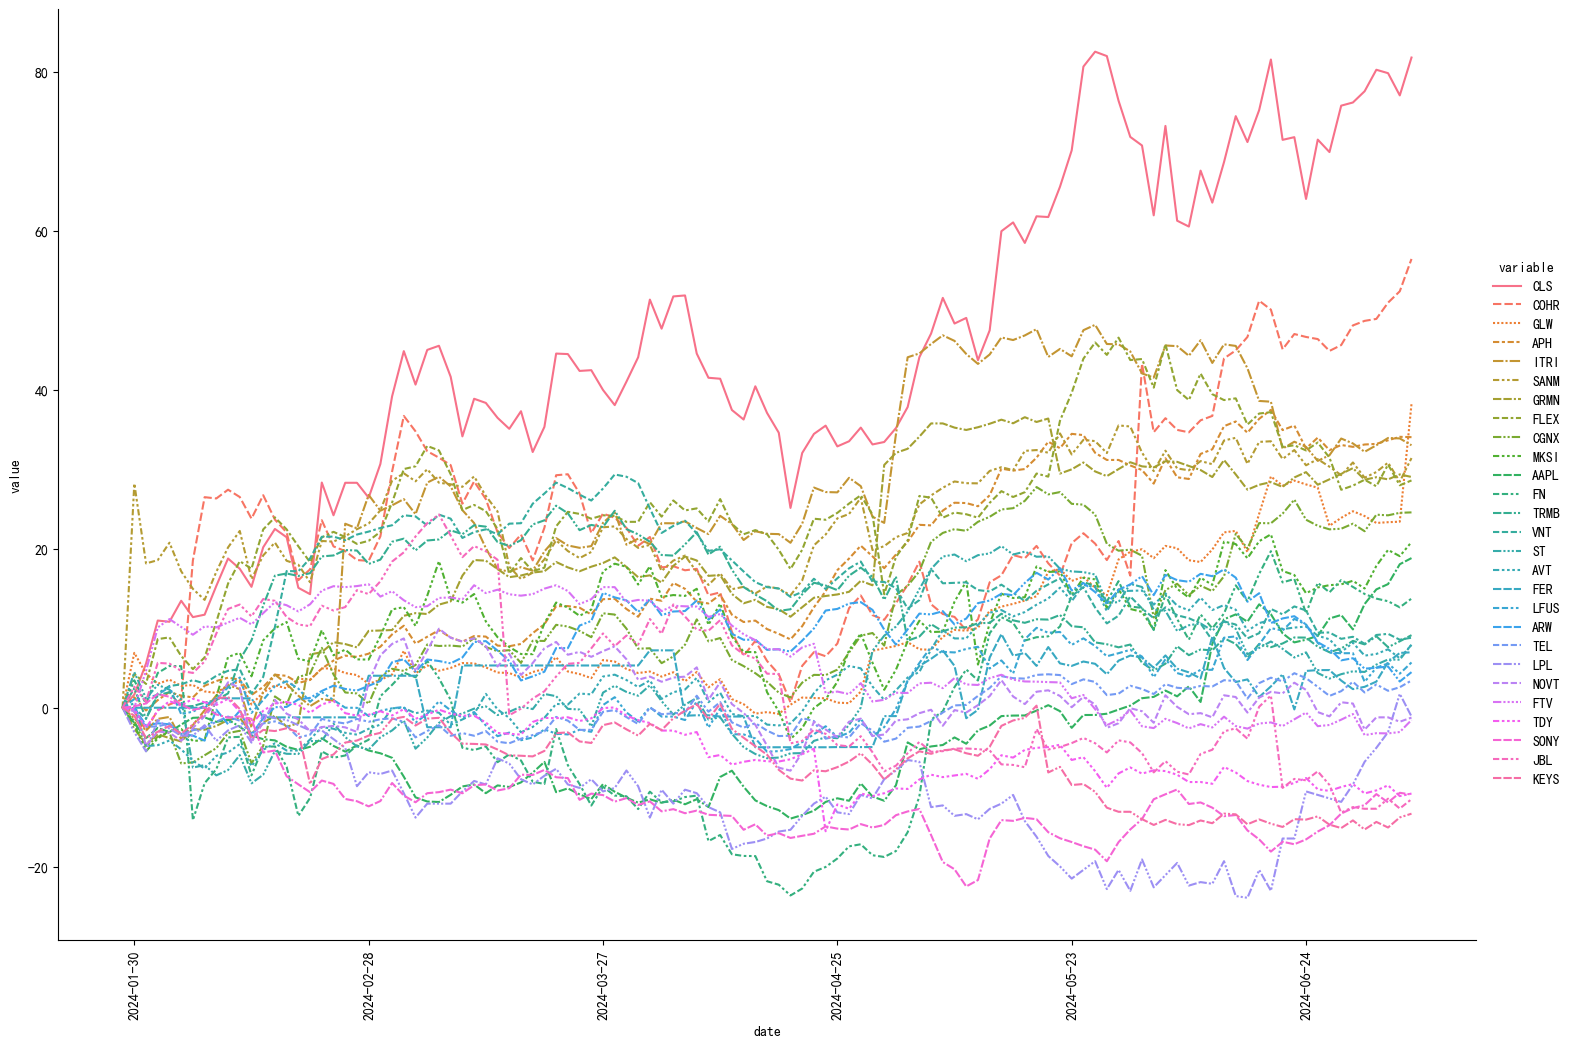

In [3]:
from utils.us_equity_utils import *

# symbols = ["AMZN", "AAPL", "NFLX", "GOOG"]
symbols = result[0].index
# symbols = us_equity_symbol_load().head(2000)
# data = us_equity_daily_data_load(symbols = symbols, option = 'close')

start_date = '2024-01-29'
end_date = '2024-07-08'

data = us_equity_daily_data_load(symbols = symbols, start_date = start_date, end_date = end_date, option = 'close')
data = pd.DataFrame(data)
data = data.sub(data.iloc[0, :], axis=1).div(data.iloc[0, :], axis=1) * 100

sorted_columns = data.iloc[-1].sort_values(ascending=False).index
data = data[sorted_columns]
# data = data.loc[:, data.iloc[-1] > 30]

file = sector_name + start_date + "_" + end_date + ".csv"
folder = us_equity_research_folder(sub_folder = "price", file_name = file, data = data)

print(data.tail(1).transpose())

# Convert the DataFrame to long format
df_long = data.reset_index().melt(id_vars='date', var_name='variable', value_name='value')

# Create a line plot using Seaborn's relplot
g = sns.relplot(
    data=df_long, 
    x='date', 
    y='value', 
    hue='variable', 
    kind='line',
    style='variable',  # Different line styles for each variable
    height=10,    # Height of each facet
    aspect=1.5  # Aspect ratio of each facet
)


# Rotate x-axis labels and set only a subset of ticks
for ax in g.axes.flat:
    x = data.index[1:-1:20]
    ax.set_xticks(x)  # Set the desired tick positions
    ax.set_xticklabels(x)  # Set the desired tick labels
    for label in ax.get_xticklabels():
        label.set_rotation(90)